Exploratory Analysis of National Survey on Discrimination
ENADIS 2017 (Women)

In [48]:
#librerias
import imp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mysql.connector 
%matplotlib inline

plt.rcParams["figure.facecolor"]='white'

In this project, a SQL database was used with tables of the catalogs of responses and results of the survey.

In [49]:
#conexion with MySQL
host='127.0.0.1'
user='python'
db='inegi'
connection=mysql.connector.connect(
    host=host,
    user=user,
    database=db
    )

In [50]:
#table of results
table='SELECT * FROM conjunto_de_datos_tmujer_enadis_2017'
data=pd.read_sql(table, connection)
data

d:\DIEGO\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,upm,viv_sel,hogar,n_ren,pm7_1,pm7_2,pm7_3_1,pm7_3_2,pm7_3_3,pm7_3_4,...,pm7_5,pm7_6,factor_per,upm_dis,est_dis,tloc,estrato,ent,sexo,edad
0,100040,2,1,1,2,4,2,1,2,2,...,3,0,186,1,2,1,3,1,2,66
1,100040,2,1,2,2,6,2,2,2,2,...,2,0,186,1,2,1,3,1,2,55
2,100040,3,1,2,3,5,2,2,2,2,...,2,0,209,1,2,1,3,1,2,28
3,100040,4,1,3,4,1,1,1,2,2,...,2,1,186,1,2,1,3,1,2,42
4,100040,4,1,4,9,0,0,0,0,0,...,0,0,186,1,2,1,3,1,2,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9360,905085,2,1,4,1,1,2,2,2,2,...,2,0,8285,1422,102,1,2,9,2,21
9361,905085,4,1,3,1,4,1,1,1,1,...,3,8,1591,1422,102,1,2,9,2,68
9362,905239,1,1,2,1,2,1,2,1,2,...,2,0,941,1423,102,1,2,9,2,33
9363,905239,2,1,1,3,5,1,2,2,2,...,1,0,941,1423,102,1,2,9,2,37


The answer catalogs contain the meaning of each key

The survey consisted of various questions coded as pm_7_n where the number 7 corresponds to the section for women and n the question number of said section

In [51]:
diccionario_pm_7='SELECT * FROM pm7_1'
pd.read_sql(diccionario_pm_7,connection)

d:\DIEGO\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cve,descrip
0,1,Mucho
1,2,Algo
2,3,Poco
3,4,Nada
4,9,No sabe


To perform the SQL queries, we used RIGHT JOIN between the catalogs and the results tables

Starting with the questions

d:\DIEGO\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


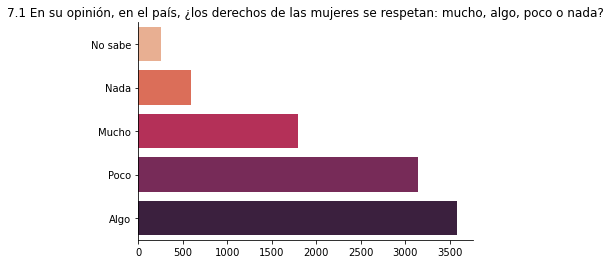

In [52]:
#query
value_counts_pm7="""SELECT c.descrip, COUNT(d.pm7_1) as cuenta FROM pm7_1 as c RIGHT
JOIN conjunto_de_datos_tmujer_enadis_2017 as d
ON c.cve=d.pm7_1 GROUP BY d.pm7_1"""

#read query to DataFrame
value_counts_pm7=pd.read_sql(value_counts_pm7,connection)
value_counts_pm7
value_counts_pm7=value_counts_pm7.sort_values('cuenta', ascending=True)


#plot results
sns.barplot(x=value_counts_pm7['cuenta'],
            y=value_counts_pm7['descrip'],
            data=value_counts_pm7,
            palette='rocket_r'
            )
            
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0) #ha='right' )
sns.despine()
plt.title('7.1 En su opinión, en el país, ¿los derechos de las mujeres se respetan: mucho, algo, poco o nada?')
plt.savefig('/DIEGO/Documents/CODIGO/Discriminación en mujeres/Gráficas/pregunta7_1.png',bbox_inches='tight')


d:\DIEGO\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


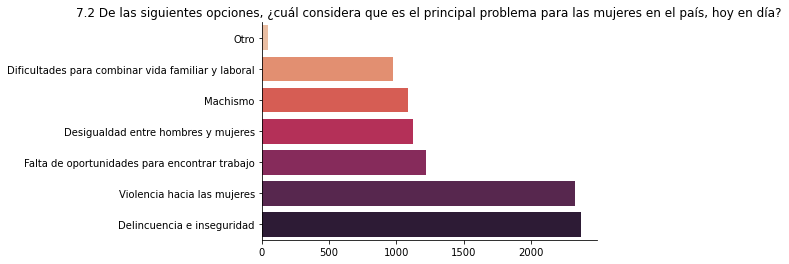

In [53]:
#query
value_counts_pm7_2="""SELECT c.descrip, COUNT(d.pm7_2) as cuenta FROM pm7_2 as c RIGHT
JOIN conjunto_de_datos_tmujer_enadis_2017 as d
ON c.cve=d.pm7_2 GROUP BY d.pm7_2"""

#read query to DataFrame
value_counts_pm7_2=pd.read_sql(value_counts_pm7_2,connection)
value_counts_pm7_2=value_counts_pm7_2.sort_values('cuenta', ascending=True)

#plot results
sns.barplot(x=value_counts_pm7_2['cuenta'],
            y=value_counts_pm7_2['descrip'],
            data=value_counts_pm7_2,
            palette='rocket_r',
            )

plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.title('7.2 De las siguientes opciones, ¿cuál considera que es el principal problema para las mujeres en el país, hoy en día?')
plt.savefig('/DIEGO/Documents/CODIGO/Discriminación en mujeres/Gráficas/pregunta7_2.png',bbox_inches='tight')

 Question three consisted of statements with which the respondents had to say whether or not they agreed with it

In [54]:
#querys for each statements
value_counts_pm7_3=[]
for i in range(1,6):
    query="""SELECT c.descrip, COUNT(d.pm7_3_{}) as cuenta FROM pm7_3 as c RIGHT
    JOIN conjunto_de_datos_tmujer_enadis_2017 as d
    ON c.cve=d.pm7_3_{} GROUP BY d.pm7_3_{}""".format(i,i,i)
    value_counts_pm7_3.append(query)    

In [55]:
value_counts_pm7_3

['SELECT c.descrip, COUNT(d.pm7_3_1) as cuenta FROM pm7_3 as c RIGHT\n    JOIN conjunto_de_datos_tmujer_enadis_2017 as d\n    ON c.cve=d.pm7_3_1 GROUP BY d.pm7_3_1',
 'SELECT c.descrip, COUNT(d.pm7_3_2) as cuenta FROM pm7_3 as c RIGHT\n    JOIN conjunto_de_datos_tmujer_enadis_2017 as d\n    ON c.cve=d.pm7_3_2 GROUP BY d.pm7_3_2',
 'SELECT c.descrip, COUNT(d.pm7_3_3) as cuenta FROM pm7_3 as c RIGHT\n    JOIN conjunto_de_datos_tmujer_enadis_2017 as d\n    ON c.cve=d.pm7_3_3 GROUP BY d.pm7_3_3',
 'SELECT c.descrip, COUNT(d.pm7_3_4) as cuenta FROM pm7_3 as c RIGHT\n    JOIN conjunto_de_datos_tmujer_enadis_2017 as d\n    ON c.cve=d.pm7_3_4 GROUP BY d.pm7_3_4',
 'SELECT c.descrip, COUNT(d.pm7_3_5) as cuenta FROM pm7_3 as c RIGHT\n    JOIN conjunto_de_datos_tmujer_enadis_2017 as d\n    ON c.cve=d.pm7_3_5 GROUP BY d.pm7_3_5']

d:\DIEGO\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
d:\DIEGO\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
d:\DIEGO\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
d:\DIEGO\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionoth

<Figure size 7200x50400 with 0 Axes>

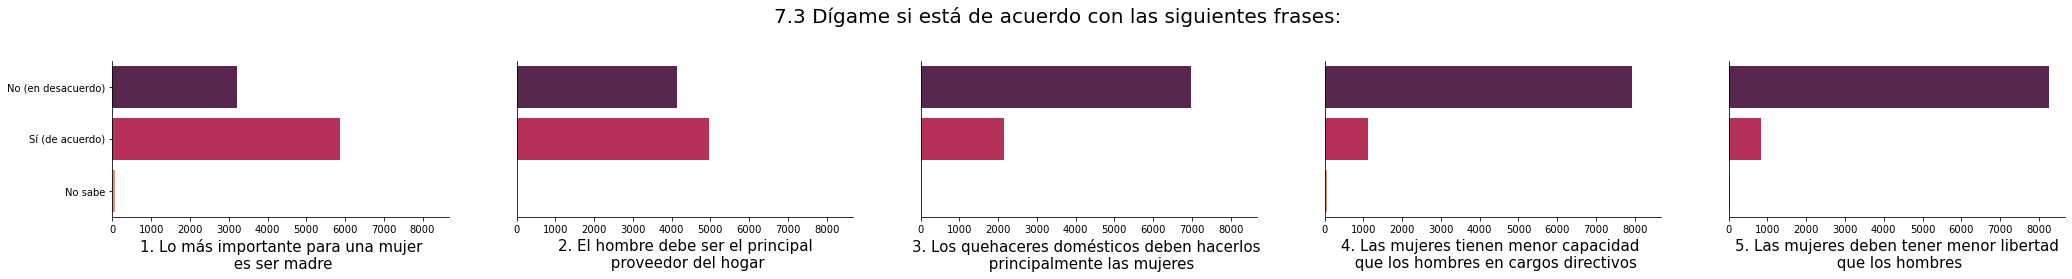

In [56]:
#a single figure for all statements
plt.figure(figsize=(100,700))
fig, axes= plt.subplots(1,5,sharex=True, figsize=(35,3))
i=0
preguntas=['1. Lo más importante para una mujer\n es ser madre',
           '2. El hombre debe ser el principal\n proveedor del hogar',
           '3. Los quehaceres domésticos deben hacerlos \n principalmente las mujeres',
           '4. Las mujeres tienen menor capacidad \n que los hombres en cargos directivos',
           '5. Las mujeres deben tener menor libertad\n que los hombres']


for query in value_counts_pm7_3:

    value_counts_pm7_3_plot=pd.read_sql(query,connection)
   # value_counts_pm7_3_plot=value_counts_pm7_3_plot.sort_values('cuenta', ascending=True)


    sns.barplot(ax=axes[i],
                x=value_counts_pm7_3_plot['cuenta'],
                y=value_counts_pm7_3_plot['descrip'], 
                data=value_counts_pm7_3_plot,
                palette='rocket'
                ) 
    
    axes[i].set_xlabel(preguntas[i], fontsize=15)
    axes[i].set_ylabel('')
    
    if i!=0:
        axes[i].set_yticks([])
    
    sns.despine()
    
    i+=1
  
fig.subplots_adjust(top=0.85) 
plt.suptitle('7.3 Dígame si está de acuerdo con las siguientes frases:', fontsize=20, position=(0.5, 1.1))
plt.savefig('/DIEGO/Documents/CODIGO/Discriminación en mujeres/Gráficas/pregunta7_3.png',bbox_inches='tight')

Because question 4 consists of specific questions with multiple optional answers, we keep only the three most common of each in a dictionary

In [57]:
#posible answers
diccionario_pm_7_4='SELECT * FROM pm7_4'
pd.read_sql(diccionario_pm_7_4,connection)

d:\DIEGO\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cve,descrip
0,1,Sólo ella
1,2,"Esposo(a), pareja o novio(a)"
2,3,Ambos
3,4,"Familiares (mamá, papá, hermanos(as))"
4,5,Otra(s) persona(s)
5,6,No aplica
6,8,No responde


In [58]:
#querys
value_counts_pm7_4=[]
for i in range(1,6):
    query="""SELECT c.descrip, COUNT(d.pm7_4_{}) as cuenta FROM pm7_4 as c RIGHT
    JOIN conjunto_de_datos_tmujer_enadis_2017 as d
    ON c.cve=d.pm7_4_{} GROUP BY d.pm7_4_{} """.format(i,i,i)
    value_counts_pm7_4.append(query)   

In [59]:
#table of most common answers
tables_7_4={}
preguntas7_4=['1 si puede comprarse cosas para usted (ropa, accesorios, zapatos)?',
              '2 si puede salir de su casa?',
              '3 si puede reunirse con parientes o amistades?',
              '4 si usa métodos anticonceptivos?',
              '5 cuántos hijos tener?']
i=0

for query in value_counts_pm7_4:

    value_counts_pm7_4_plot=pd.read_sql(query,connection)
    value_counts_pm7_4_plot=value_counts_pm7_4_plot.sort_values('cuenta', ascending=False)
    tables_7_4[preguntas7_4[i]]=value_counts_pm7_4_plot.head(n=3)
    i+=1

d:\DIEGO\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
d:\DIEGO\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
d:\DIEGO\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
d:\DIEGO\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionoth

In [60]:
tables_7_4['4 si usa métodos anticonceptivos?']

,descrip,cuenta
0,None,5687
2,Ambos,1608
1,Sólo ella,1549


In [61]:
#print tables
for i in range(0,5):
    print(list(tables_7_4.keys())[i])
    print('----------------------------------------')
    print(list(tables_7_4.values())[i])
    print(end='\n')
    print(end='\n')


1 si puede comprarse cosas para usted (ropa, accesorios, zapatos)?
----------------------------------------
                                 descrip  cuenta
0                              Sólo ella    6939
2                                  Ambos    1452
4  Familiares (mamá, papá, hermanos(as))     424


2 si puede salir de su casa?
----------------------------------------
                                 descrip  cuenta
0                              Sólo ella    6091
1                                  Ambos    1711
3  Familiares (mamá, papá, hermanos(as))     804


3 si puede reunirse con parientes o amistades?
----------------------------------------
                                 descrip  cuenta
0                              Sólo ella    6093
1                                  Ambos    2061
4  Familiares (mamá, papá, hermanos(as))     580


4 si usa métodos anticonceptivos?
----------------------------------------
     descrip  cuenta
0       None    5687
2      Ambos    1608
1 

Finally, for the last questions we carry out the same process as for questions 1 and 2

In [62]:
#querys
value_counts_pm7_5y6=[]
for i in range(5,7):
    query="""SELECT c.descrip, COUNT(d.pm7_{}) as cuenta FROM pm7_{} as c RIGHT
    JOIN conjunto_de_datos_tmujer_enadis_2017 as d
    ON c.cve=d.pm7_{} GROUP BY d.pm7_{} """.format(i,i,i,i)
    value_counts_pm7_5y6.append(query) 

d:\DIEGO\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
d:\DIEGO\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


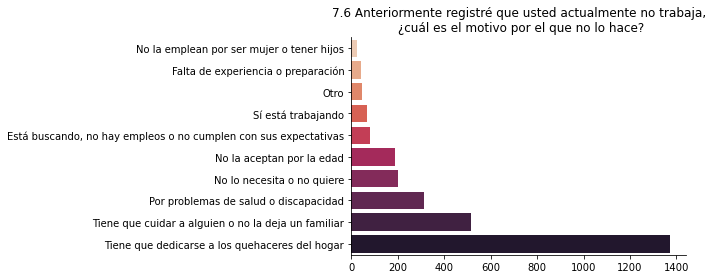

In [63]:

preguntas_5y6={'pregunta7_5':'7.5 En los últimos cinco años, de agosto de 2012 a la fecha,\n ¿Le ha sucedido que le den menor paga con respecto a un hombrepor realizar el mismo trabajo?','pregunta7_6':'7.6 Anteriormente registré que usted actualmente no trabaja,\n ¿cuál es el motivo por el que no lo hace?'}
i=0


for query in value_counts_pm7_5y6:

    #read querys to DataFrame
    value_counts_pm7_5y6_plot=pd.read_sql(query,connection)
    value_counts_pm7_5y6_plot=value_counts_pm7_5y6_plot.sort_values('cuenta', ascending=True)

    #plot
    plt.clf()
    sns.barplot(x=value_counts_pm7_5y6_plot['cuenta'],
                y=value_counts_pm7_5y6_plot['descrip'], 
                data=value_counts_pm7_5y6_plot,
                palette='rocket_r'
                ) 

    plt.xlabel('')
    plt.ylabel('')
    sns.despine()
    plt.title(list(preguntas_5y6.values())[i],position=(0.5, 1.1))
    plt.savefig('/DIEGO/Documents/CODIGO/Discriminación en mujeres/Gráficas/'+str(list(preguntas_5y6.keys())[i])+'.png',bbox_inches='tight')
    i+=1
